In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression

In [2]:
# Load the dataset
df = pd.read_csv('dataset.csv')

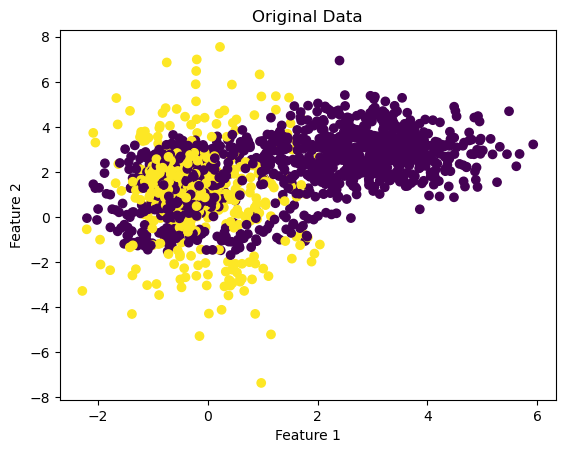

In [3]:
# Visualize the data
plt.scatter(df['feature_1'], df['feature_2'], c=df['isVirus'])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Original Data')
plt.show()

In [4]:
# Balance the data
virus_df = df[df['isVirus'] == True]
not_virus_df = df[df['isVirus'] == False]
not_virus_sample_df = not_virus_df.sample(len(virus_df))
balanced_df = pd.concat([virus_df, not_virus_sample_df], axis=0)

In [5]:
# Impute missing values with mean
balanced_df.fillna(balanced_df.mean(), inplace=True)

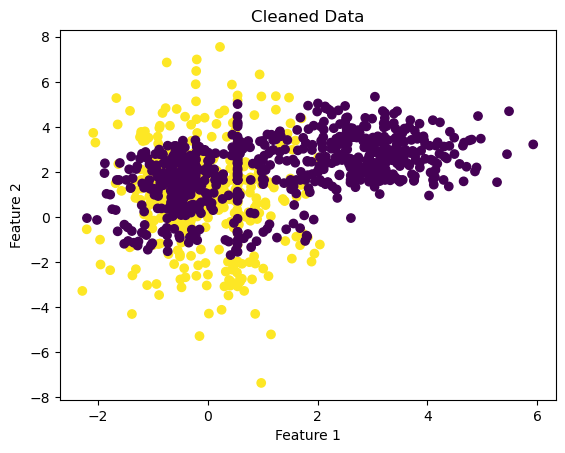

In [6]:
# Visualize the cleaned data
plt.scatter(balanced_df['feature_1'], balanced_df['feature_2'], c=balanced_df['isVirus'])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Cleaned Data')
plt.show()

In [7]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(balanced_df.iloc[:, :-1], balanced_df.iloc[:, -1], test_size=0.2, random_state=42)

In [8]:
# Train the model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [9]:
# Evaluate the model
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 75  49]
 [ 26 117]]
              precision    recall  f1-score   support

       False       0.74      0.60      0.67       124
        True       0.70      0.82      0.76       143

    accuracy                           0.72       267
   macro avg       0.72      0.71      0.71       267
weighted avg       0.72      0.72      0.72       267



In [10]:
# Plot the decision boundary
w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-10, 10)
yy = a * xx - (model.intercept_[0]) / w[1]

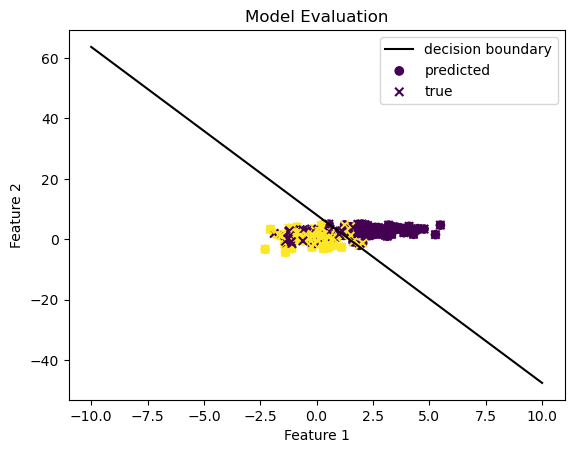

In [11]:
plt.plot(xx, yy, 'k-', label='decision boundary')
plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_pred, label='predicted')
plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_test, marker='x', label='true')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Model Evaluation')
plt.legend()
plt.show()

# All code in one line

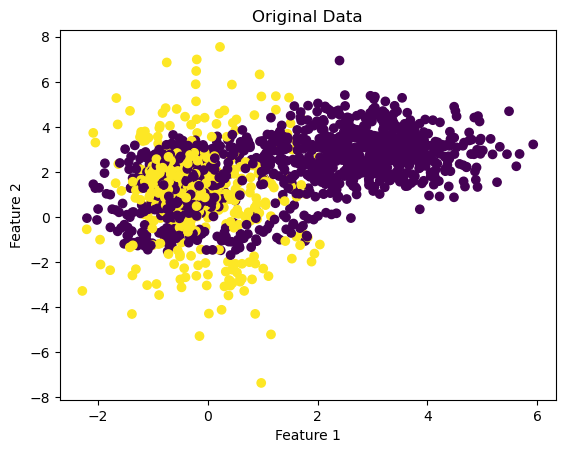

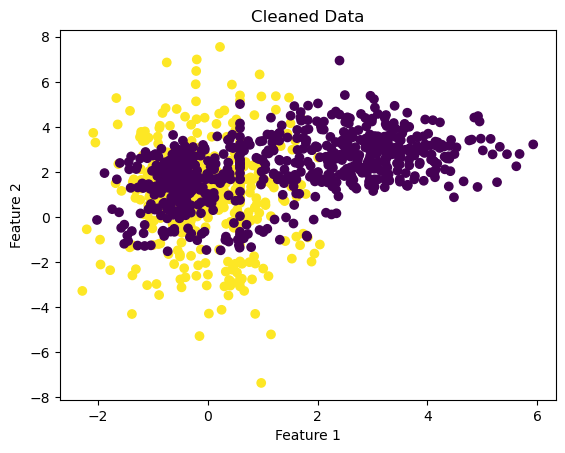

[[ 72  52]
 [ 23 120]]
              precision    recall  f1-score   support

       False       0.76      0.58      0.66       124
        True       0.70      0.84      0.76       143

    accuracy                           0.72       267
   macro avg       0.73      0.71      0.71       267
weighted avg       0.73      0.72      0.71       267



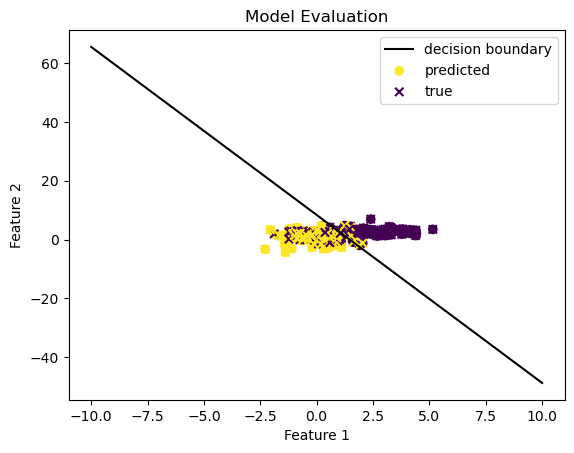

In [12]:
# Visualize the data
plt.scatter(df['feature_1'], df['feature_2'], c=df['isVirus'])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Original Data')
plt.show()

# Balance the data
virus_df = df[df['isVirus'] == True]
not_virus_df = df[df['isVirus'] == False]
not_virus_sample_df = not_virus_df.sample(len(virus_df))
balanced_df = pd.concat([virus_df, not_virus_sample_df], axis=0)

# Impute missing values with mean
balanced_df.fillna(balanced_df.mean(), inplace=True)

# Visualize the cleaned data
plt.scatter(balanced_df['feature_1'], balanced_df['feature_2'], c=balanced_df['isVirus'])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Cleaned Data')
plt.show()

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(balanced_df.iloc[:, :-1], balanced_df.iloc[:, -1], test_size=0.2, random_state=42)

# Train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Plot the decision boundary
w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-10, 10)
yy = a * xx - (model.intercept_[0]) / w[1]

plt.plot(xx, yy, 'k-', label='decision boundary')
plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_pred, label='predicted')
plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_test, marker='x', label='true')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Model Evaluation')
plt.legend()
plt.show()